# Get the data into our notebook

> <font size="5"> 📚 Check out the [Github reference](https://github.com/mrdbourke/tensorflow-deep-learning) of Daniel Bourke </font> 

## IMPORTS

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Download the data with wget

In [2]:
if "BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" in os.listdir():
    print('CSV file already downloaded and accessible in the directory')
else:
    try:
        !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
    except:
        print("command wget not working - Install by 'brew install wget'")

CSV file already downloaded and accessible in the directory


## Import CSV with pandas

In [3]:
# read in data from csv
# fromat dates to datetime and set as index
path = 'BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv'
df = pd.read_csv(path,sep=',',parse_dates=['Date'],index_col = 'Date')

In [4]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


## Plot the data using pandas

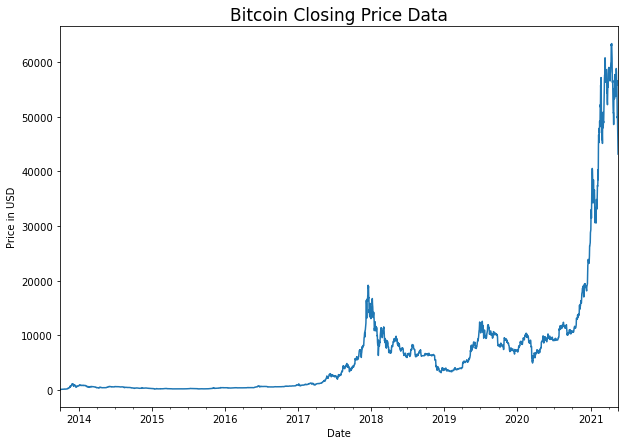

In [7]:
df.iloc[:,1].plot(figsize=(10,7))
plt.title('Bitcoin Closing Price Data',fontsize=17)
plt.ylabel('Price in USD')
plt.show()

> 🔑 **Seasonality**: The seasonality of time series data is how many samples do we have of this data per year. So for our Bitcoin data we have a saisonality of daily or a value of 365.

In [8]:
bitcion_prices = df[['Closing Price (USD)']].rename(columns={'Closing Price (USD)':'Price'})

In [9]:
bitcion_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [10]:
bitcion_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2787 non-null   float64
dtypes: float64(1)
memory usage: 43.5 KB


## Read in the data using pythons csv module

In [11]:
from datetime import datetime

In [12]:
import csv
with open(path, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    next(csvfile) # skip header row
    dates = []
    prices = []
    for row in spamreader:
        dates.append(datetime.strptime(row[1],'%Y-%m-%d'))
        prices.append(float(row[2]))

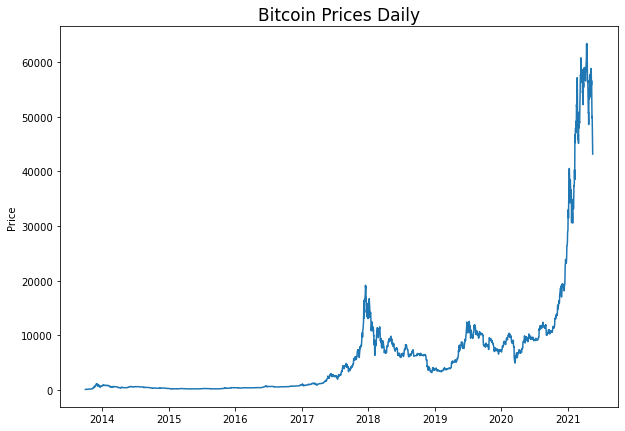

In [13]:
plt.figure(figsize=(10,7))
plt.plot(dates,prices)
plt.ylabel('Price')
plt.title('Bitcoin Prices Daily',fontsize=17)
plt.show()

# Prepare the data

## Create train and test splits

In [14]:
# 80% train and 20% test
split_size = int(len(bitcion_prices)*0.8)

# create train set
X_train,y_train = dates[:split_size], prices[:split_size]

# create test set
X_test, y_test = dates[split_size:], prices[split_size:]

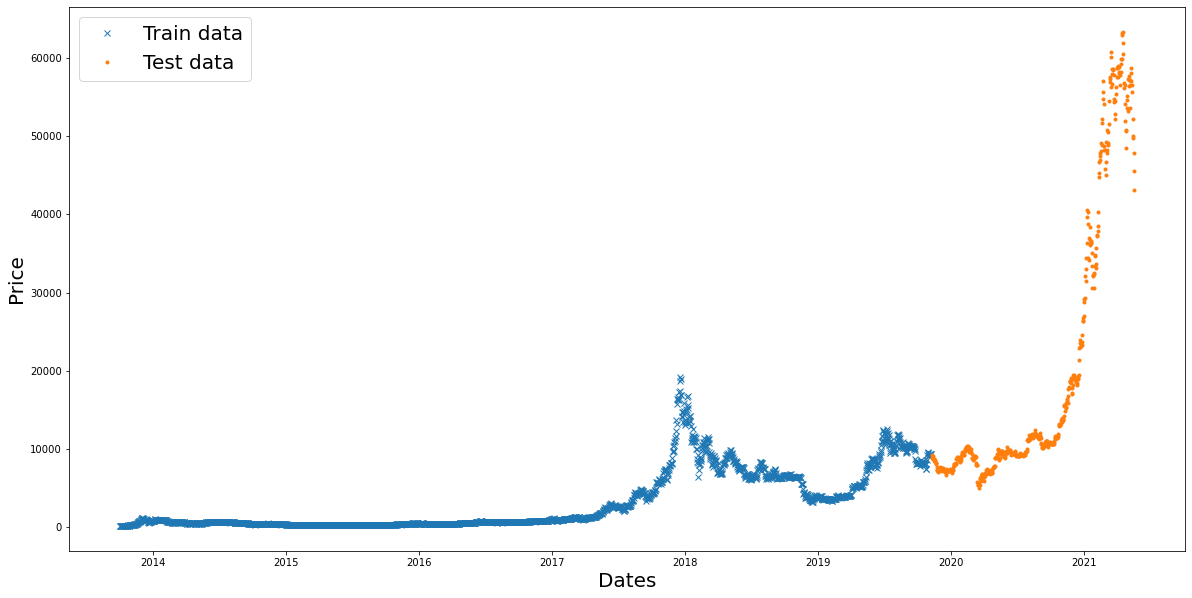

In [15]:
plt.figure(figsize=(20,10))
plt.plot(X_train,y_train,'x')
plt.plot(X_test,y_test,'.')
plt.legend(['Train data','Test data'],fontsize=20)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

### Creating a plotting fuction

In [16]:
import matplotlib.pyplot as plt
# create a function to plot the data
def plot_time_series(timestamp,values,formated='.',start=0,end=None,label=None):
    """
    Plots our timeseries
    """
    plt.plot(timestamp[start:end],values[start:end],formated,label=label)
    plt.xlabel('Time')
    plt.ylabel('BTC Price')
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

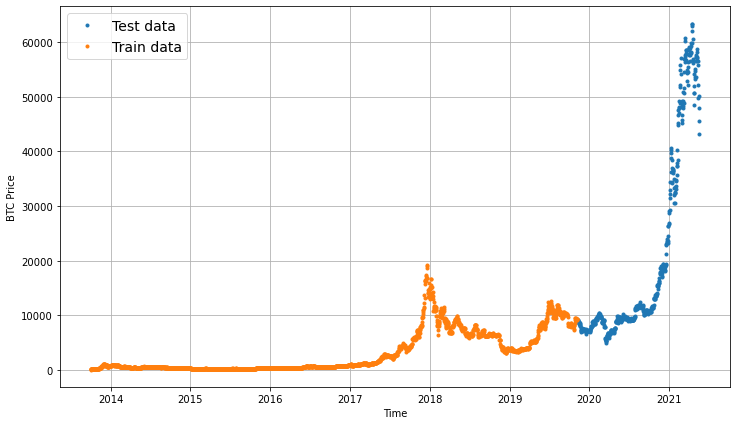

In [17]:
plt.figure(figsize=(12,7))
plot_time_series(X_test,y_test,label='Test data')
plot_time_series(X_train,y_train,label='Train data')

# Model 0 - Naive Time Series Model

Model Formula: $y_{t + 1} = y_t $

In [24]:
# create the Naive baseline forecast
naive_forecast = y_test[:-1]

## Plot the naive forcast against test data

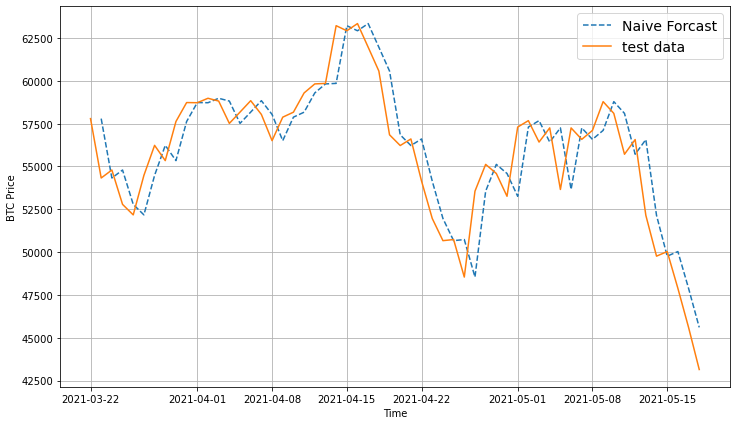

In [35]:
plt.figure(figsize=(12,7))
plot_time_series(X_test[1:],naive_forecast,start=500,end=1000, formated='--',label='Naive Forcast')
plot_time_series(X_test,y_test,start=500, end=1000,formated='-',label='test data')

## Evaluation of our Naive Model



### Implementing the MASE (Mean Absolute Scaled Error)

MASE = $\frac{\frac{1}{J}\sum_j |e_j|}{\frac{1}{T-1}\sum_{t=2}^{T} |Y_t - Y_{t-1}|} $\
where \
$e_j$ ... [__forcast error__](https://en.wikipedia.org/wiki/Forecast_error) (difference between the actual and predicted value) \
$j \in \{1,...,J\}$ with J as the number of forecasts (in our case $J=1$)


In [64]:
import numpy

In [84]:
def get_mase(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nom = np.mean(np.abs((y_true-y_pred)))
    denom = np.mean(np.abs((y_true[1:]-y_true[:-1])))
    return nom/denom

In [92]:
mase = get_mase(y_test[1:],naive_forecast)
print('MASE has a value of %.3f'%mase)

MASE has a value of 1.000
